In [25]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
uploaded = files.upload()

Saving mtcars.csv to mtcars.csv


In [7]:
file_path = 'mtcars.csv'
df = pd.read_csv(file_path, index_col = 0)

print(df.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


In [8]:
df.info()
# mpg: 연비(miles per gallon)
# cyl: 실린더 개수(number of cylinders)
# disp: 배기량(displacement)
# hp: 마력(horsepower)
# drat: 후륜비(rear axle ratio)
# wt: 차량 무게(weight)
# qsec: 1/4 마일 달성 시간(1/4 mile time)
# vs: 엔진 형태(V/S)
# am: 변속기 종류(automatic or manual)
# gear: 기어 수(number of gears)
# carb: 기화기 개수(number of carburetors)

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 4.0+ KB


In [ ]:
# scaled_df를 만들어라 ...
# 데이터 불러오기 → info() → 결측치, 문제, 컬럼, Dtype 확인 → describe() 통계적 요약 확인
# 중요 변수 탐색 → 상관 관계(종속 변수와 독립변수 간에 상관관계 확인), 변수 자체에 대한 분포
# 상관 관계는 높은게 연관성이 높음
# 독립변수간의 상관관계는 낮을수록 좋음
# 파생 변수 → 탐색적 분석을 통해서 시도를 해봐야 확인 가능
# 파생 변수와 종속 변수 간의 상관 관계를 보면 파생 변수가 의미가 있는지 확인이 가능하다.
# 표준화, 정규화를 한 후에 → 적용할 분석용 데이터 셋을 찾는다.


In [10]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [11]:
# 상관계수 계산하기
cor_matrix = df.select_dtypes(include = [np.number]).corr()
print(cor_matrix)

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

In [14]:
# mpg(연비)의 상관 계수 정렬
mpg_cor = cor_matrix['mpg'].sort_values(ascending = False).reset_index()
print(mpg_cor)

   index       mpg
0    mpg  1.000000
1   drat  0.681172
2     vs  0.664039
3     am  0.599832
4   gear  0.480285
5   qsec  0.418684
6   carb -0.550925
7     hp -0.776168
8   disp -0.847551
9    cyl -0.852162
10    wt -0.867659


In [24]:
# 표준화를 진행하기
scalar_df = StandardScaler()
scaled_features = scalar_df.fit_transform(df)

# 표준화된 데이터를 DataFrame으로 변환하기
scaled_df = pd.DataFrame(scaled_features, columns = df.columns)
scaled_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083
5,-0.335572,-0.106668,-0.046906,-0.617748,-1.589643,0.252064,1.348220,1.133893,-0.827170,-0.946729,-1.140108
6,-0.976163,1.031121,1.059772,1.456847,-0.734549,0.366285,-1.142114,-0.881917,-0.827170,-0.946729,0.746967
7,0.726459,-1.244457,-0.688779,-1.254944,0.177551,-0.028296,1.223135,1.133893,-0.827170,0.430331,-0.511083
8,0.456737,-1.244457,-0.737144,-0.765933,0.614599,-0.069830,2.871986,1.133893,-0.827170,0.430331,-0.511083
9,-0.150138,-0.106668,-0.517448,-0.351014,0.614599,0.231297,0.256567,1.133893,-0.827170,0.430331,0.746967


In [41]:
# 차량 무게(wt)의 무게값들을 절반으로 줄여서 다시 해당 데이터프레임에 주입하기
scaled_df['wt'] *= 0.7
scaled_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.303882,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.174137,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.456522,0.432823,1.133893,1.208941,0.430331,-1.140108
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.001145,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.113336,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083
5,-0.335572,-0.106668,-0.046906,-0.617748,-1.589643,0.123512,1.348220,1.133893,-0.827170,-0.946729,-1.140108
6,-0.976163,1.031121,1.059772,1.456847,-0.734549,0.179480,-1.142114,-0.881917,-0.827170,-0.946729,0.746967
7,0.726459,-1.244457,-0.688779,-1.254944,0.177551,-0.013865,1.223135,1.133893,-0.827170,0.430331,-0.511083
8,0.456737,-1.244457,-0.737144,-0.765933,0.614599,-0.034217,2.871986,1.133893,-0.827170,0.430331,-0.511083
9,-0.150138,-0.106668,-0.517448,-0.351014,0.614599,0.113336,0.256567,1.133893,-0.827170,0.430331,0.746967


In [39]:
# 타겟 설정하기
target_variable = 'mpg'

In [31]:
# 연비와 실린더 갯수와의 관계
# 결과 : 실린더의 갯수가 증가할수록 연비는 크게 감소한다.
mpg_cyl = df.groupby('mpg')['cyl'].mean().to_dict()

# 연비별 평균 실린더 개수 파생변수 만들기
df['mpg_cyl'] = df['mpg'].map(mpg_cyl)
df[['mpg', 'cyl', 'mpg_cyl']]

# mpg_cyl와 ___ 간의 상관 계수 계산
mpg_cyl_with_cor_1 = df[['mpg_cyl', 'wt']].corr().iloc[0, 1]
mpg_cyl_with_cor_1

0.7829908136157636

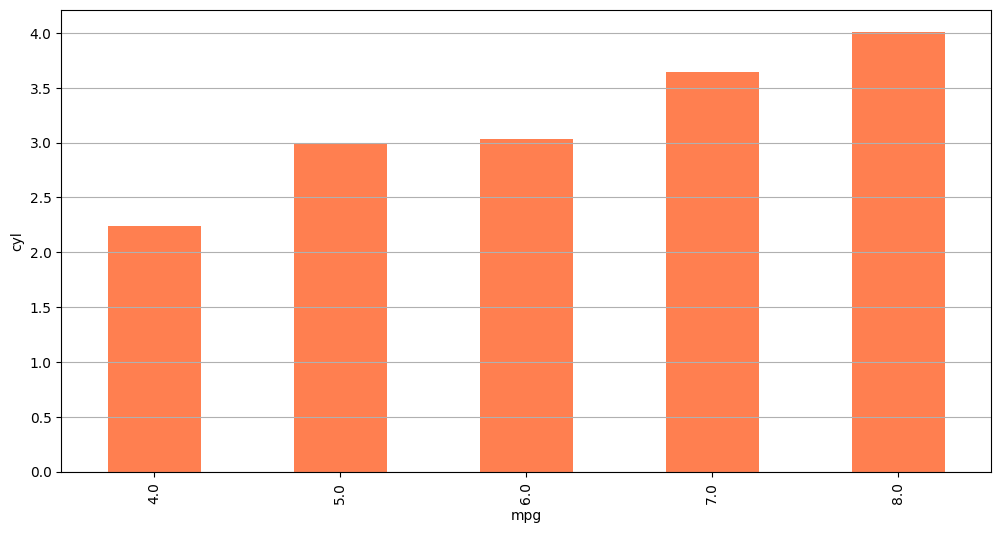

In [37]:
mpg_rate = df.groupby('mpg_cyl')['wt'].mean()

plt.figure(figsize = (12, 6))
mpg_rate.plot(kind = 'bar', color = 'coral')
plt.title('')
plt.xlabel('mpg')
plt.ylabel('cyl')
plt.grid(axis = 'y')

plt.show()

In [ ]:
df[['mean_fare_by_pclass', 'survived']].corr().iloc[0,1]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 0.29
Root Mean Squared Error: 0.54
R-squared: 0.75


In [ ]:
# wt의 값을 30% 감소 시킨 결과 :

# Mean Squared Error: 0.29
# Root Mean Squared Error: 0.54
# R-squared: 0.75